In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from sklearn.metrics import mean_squared_error

In [2]:
dataset=pd.read_csv("Labeled_Pics.csv")

In [3]:
dataset

,Image,Touching surface(1) or not(0)
0,9311-image-0001-0ms.png,0
1,9311-image-0002-200ms.png,0
2,9311-image-0003-400ms.png,0
3,9311-image-0004-600ms.png,0
4,9311-image-0005-800ms.png,0
...,...,...
13503,9388-image-0297-59200ms.png,0
13504,9388-image-0298-59400ms.png,0
13505,9388-image-0299-59600ms.png,0
13506,9388-image-0300-59800ms.png,0


In [4]:
plot_data_0=[]
plot_data_1=[]
FrobNorm=[]
DESTINATION="ALL_PICS"
img = cv2.imread(DESTINATION+"/"+os.listdir(DESTINATION)[0],cv2.IMREAD_GRAYSCALE)
vecR=np.array([1 for i in range(img.shape[1])])
vecC=np.array([1 for i in range(img.shape[0])])

for i in range(len(dataset.iloc[:,0])):
    img = cv2.imread(DESTINATION+"/"+dataset.iloc[:,0][i],cv2.IMREAD_GRAYSCALE)
    ret,img = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)

#     norm_row=img.dot(vecR)
#     norm_col=np.sqrt(np.trace(img.dot(img.T)))
    norm_col=np.linalg.norm(img,ord="fro")
    FrobNorm.append(norm_col)
    if dataset.iloc[:,1][i]==1:
        if norm_col<1000:
            plot_data_1.append(norm_col)
    else:
#         if 0<norm_col<200:
#             print(dataset.iloc[:,0][i])
        plot_data_0.append(norm_col)

In [5]:
dataset["frobNorm"]=FrobNorm

In [6]:
index_0=[]
index_1=[]
counter=0
for i in range(len(plot_data_0)):
    index_0.append(counter)
    counter+=1
counter=0
for i in range(len(plot_data_1)):
    index_1.append(counter)
    counter+=1

In [7]:
len(index_1)

364

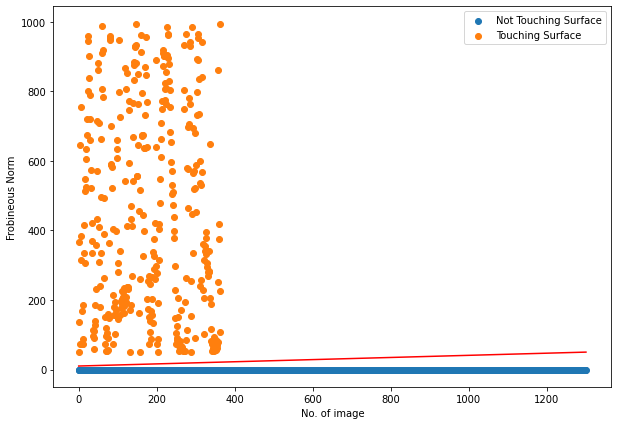

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(index_0[:1300],plot_data_0[:1300])
plt.scatter(index_1,plot_data_1)
plt.xlabel("No. of image")
plt.ylabel("Frobineous Norm")
plt.legend(('Not Touching Surface','Touching Surface'))
plt.plot([0,1300],[10,50],"r")
plt.show()
# plt.savefig("resirch.pdf")

In [9]:
def GradientDesc(Data):
    minima=0
    for i in Data:
        if i==0:
            minima+=1
    return minima

In [10]:
accList=[]
ThreshList=[]
for j in range(1000):
    THRESH=j
    y_pred=[]
    for i in dataset["frobNorm"]:
        if i>THRESH:
            y_pred.append(1)
        else:
            y_pred.append(0)
    y_act=list(dataset["Touching surface(1) or not(0)"])
    accList.append(mean_squared_error(y_act,y_pred))
    ThreshList.append(j)

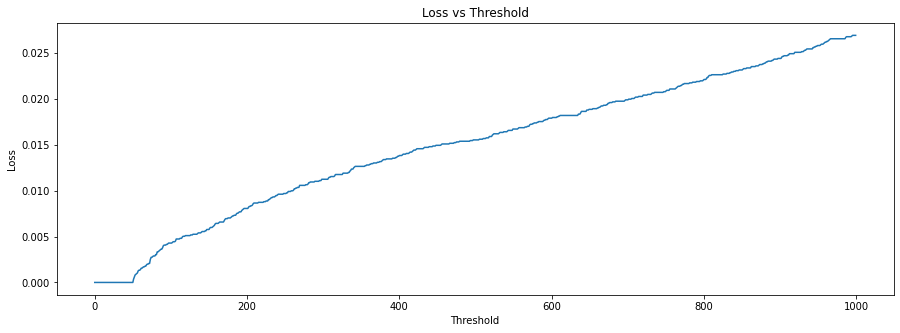

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ThreshList,accList)
plt.xlabel("Threshold")
plt.ylabel("Loss")
plt.title("Loss vs Threshold")
plt.show()

In [12]:
print(f"The optimum threshold value is : {GradientDesc(accList)}")

The optimum threshold value is : 51


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

THRESH=50
y_pred=[]
for i in dataset["frobNorm"]:
    if i>THRESH:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_act=list(dataset["Touching surface(1) or not(0)"])

print("Confusion matrix\n")
print(confusion_matrix(y_act,y_pred))

print("\n\n\t\t\tClassification Report\n")
print(classification_report(y_act,y_pred))

Confusion matrix

[[12217     0]
 [    0  1291]]


			Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12217
           1       1.00      1.00      1.00      1291

    accuracy                           1.00     13508
   macro avg       1.00      1.00      1.00     13508
weighted avg       1.00      1.00      1.00     13508

